# モンテカルロ法を用いて、巡回セールスマン問題(TSP)を解く

## ＜巡回セールスマン問題とは何か＞
　巡回セールスマン問題とは、複数の都市と都市間の移動距離が与えられたとき、ある都市からすべての都市を回り、また初めの都市に戻る最短経路を求める問題である。

## ＜モンテカルロ法とは何か＞
　問題に確率を結びつけて解を求める方法である。
 
　今回はメトロポリス法

## ＜今回のアルゴリズム＞
1. 経路1での総移動距離を求める。これをE1とする。

2. 経路1からランダムに2つの都市を選び順番を交換する。これを経路2とする。

3. 経路2の総移動距離を求める。これをE2とする。

4. dE = E2 - E1を計算する。変更された部分だけの差を求めたほうが計算量が少なく済む。

5. dE < 0 ならば、経路2を採用する。

6. dE > 0 ならば、式(1)より確率Pで経路2を採用する。（ボルツマン定数があるかもしれない）

7. これを繰り返す。

＊温度の設定は重要である。

＊あらかじめ距離を計算しておくと、毎回計算する必要がないので、処理が軽くなる

$$P = e^\frac{-dE}{T}    (1)$$

## ＜シミュレーテッドアニーリング（SA、焼きなまし法）＞
　温度の初期値を十分高くし、適当な回数試行した後、1step分温度を下げる。これを繰り返すことで、局所的最適解にとどまらず、真の最適解を求めることができる可能性が高い。
 
　温度が高いときは試行回数を少なく、温度が低いときは試行回数を多くすると、最適解が求めやすい。

## ＜温度T＞
　温度の設定が重要である。温度が十分大きいとき、P = math.exp(-dE/T)は、ほぼ１になるので、新しい配置が採用される確率が高い。逆に、Tが小さいとき、Pの値は、ほぼ０になるので、新しい配置が採用される確率は小さい。

・温度の初期値

・試行回数

・１stepでの温度の減る値


In [178]:
%matplotlib inline
import numpy as np
import math, random
import copy
import matplotlib.pyplot as plt

In [179]:
city = [] # 街の番号、座標
N = 16    # 街の数
T = 3.0   # 温度
Earray = []
# KB = 3.18064852 * math.pow(10, -23)

In [180]:
def init():
    global city, N
    for i in range(N):
        a = []
        a.append(i)
        a.append(random.uniform(0.0, 1.0))
        a.append(random.uniform(0.0, 1.0))
        city.append(a)
        plt.plot(a[1], a[2], "o")

In [181]:
def shuff():
    global city, N
    # 0番目以外をシャッフル
    ran1 = random.randint(1, N-1)
    ran2 = random.randint(1, N-1)
    rcity = copy.copy(city[ran1])
    city[ran1] = copy.copy(city[ran2])
    city[ran2] = copy.copy(rcity)

In [182]:
def energy1(i):
    global city
    return math.sqrt(math.pow(city[i+1][1]-city[i][1], 2) + math.pow(city[i+1][2]-city[i][2], 2))

def energy2():
    global city, N
    return math.sqrt(math.pow(city[N-1][1]-city[0][1], 2) + math.pow(city[N-1][2]-city[0][2], 2))

def Enote(E1, E2):
    if E1 <= E2:
        Earray.append(E1)
    elif E1 > E2:
        Earray.append(E2)
    
def dancing():
    # メインの処理
    global city, N, T
    times = 1.1
    plus = 30
    for k in range(100):
        for j in range(int(times)+plus):
            E1 = 0.0
            E2 = 0.0
            pcity = copy.copy(city)
            # 現在の総移動距離
            for i in range(1, N-1):
                E1 += energy1(i)
            E1 += energy2()
            # シャッフル
            shuff()
            # 遷移後の総移動距離
            for i in range(1, N-1):
                E2 += energy1(i)
            E2 += energy2()
            # 判定
            dE = E2 - E1
            if(dE < 0):
                pass
            else:
                ran = random.random()
                p = 0
                if(T > 0.00001):
                    p = math.exp(-dE / T)
                else:
                    p = math.exp(-100000000000000)
                if(p > ran):
                    pass
                else:
                    city = copy.copy(pcity)
            # 1000回に1回取得
            if(j % 1000 == 0):
                Enote(E1, E2)
        T -= 0.03 # 1step温度を下げる
        times *= 1.1
        plus += 10

In [183]:
def res(): 
    # ルート表示
    global city, N
    print("root",end=" : ")
    for i in range(N):
        print(city[i][0],end=" ")
    print(city[0][0])

In [184]:
def draw():
    # プロット
    global city, N
    plt.plot(city[0][1], city[0][2], "ro")
    for j in range(1, N):
        plt.plot(city[j][1], city[j][2], "bo")
    for i in range(N-1):
        plt.plot([city[i][1], city[i+1][1]], [city[i][2], city[i+1][2]], 'k-', lw=1)
    plt.plot([city[0][1], city[N-1][1]], [city[0][2], city[N-1][2]], 'k-', lw=1)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")

In [185]:
def main():
    init()
    dancing()
    res()
    draw()

root : 0 11 1 9 5 10 3 12 6 13 8 4 15 2 7 14 0


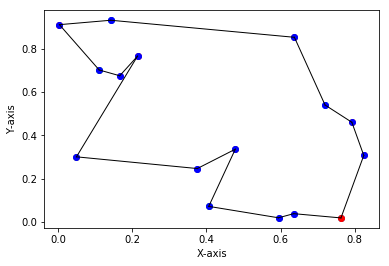

In [186]:
main()

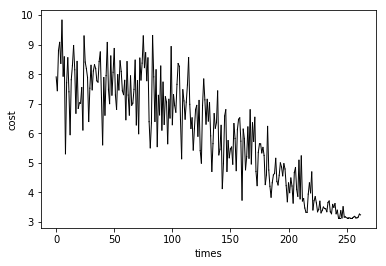

In [187]:
for i in range(len(Earray)-1):
    #plt.plot(i, Earray[i], "bo")
    plt.plot([i, i+1], [Earray[i], Earray[i+1]], 'k-', lw=1)
plt.xlabel("times")
plt.ylabel("cost")

In [188]:
c = 1.11
for i in range(100):
    c *= 1.11
print(c)

37811.23454930528
